# Factores que influyen en el rating de una serie
------------------------------------------------

# 1. Introducción

En los últimos años, las plataformas de streaming han experimentado un crecimiento exponencial, dando lugar a una oferta masiva de series televisivas producidas en distintos países, idiomas y géneros. Este fenómeno ha generado un creciente interés en comprender **qué factores influyen en la percepción de calidad de una serie**, comúnmente medida a través de calificaciones otorgadas por el público.

El análisis de datos se ha convertido en una herramienta fundamental para estudiar patrones de consumo cultural, permitiendo identificar relaciones entre variables como popularidad, número de votos, género y año de estreno. En este contexto, el presente estudio se enfoca en un conjunto de **series web altamente valoradas**, con el objetivo de explorar qué características están asociadas con mayores calificaciones promedio.


## 1.1 Contexto del dataset

El dataset utilizado en este estudio proviene de Kaggle y contiene información sobre **2000 series web mejor valoradas a nivel global**. Cada registro representa una serie e incluye metadatos relevantes como:

- Título y descripción general  
- Fecha de estreno  
- Género o combinación de géneros  
- Popularidad  
- Calificación promedio (*rating*)  
- Número de votos recibidos  

Es importante destacar que el dataset presenta un **sesgo inherente de selección**, ya que solo incluye series con calificaciones relativamente altas. Este aspecto será tenido en cuenta a lo largo del análisis, especialmente al interpretar los resultados del modelo predictivo.


## 1.2 Objetivo del estudio

El objetivo principal de este estudio es **identificar y analizar los factores que influyen en el rating de una serie web**, utilizando técnicas de análisis exploratorio de datos y modelado predictivo.

De manera específica, se busca:

- Explorar la distribución y variabilidad de los ratings.
- Analizar la relación entre el rating y variables como el número de votos, la popularidad, el género y el año de estreno.
- Evaluar en qué medida estas variables permiten predecir el rating mediante un modelo de regresión.


## 1.3 Preguntas de investigación

A partir del objetivo planteado, este estudio intenta responder las siguientes preguntas:

1. ¿Existe una relación entre el número de votos y el rating de una serie?
2. ¿La popularidad de una serie está asociada con una mayor calificación?
3. ¿Algunos géneros tienden a recibir mejores ratings que otros?
4. ¿El año de estreno influye en la percepción de calidad de una serie?
5. ¿Es posible predecir el rating de una serie utilizando únicamente metadatos básicos?


## 1.4 Estructura del análisis

El estudio se organiza de la siguiente manera:

- **Sección 2 – Data Loading & Overview:** carga del dataset, inspección inicial y descripción de variables.
- **Sección 3 – Data Cleaning & Preprocessing:** limpieza de datos, tratamiento de valores faltantes y creación de nuevas variables.
- **Sección 4 – Exploratory Data Analysis (EDA):** análisis visual y estadístico de las principales variables.
- **Sección 5 – Predictive Modeling:** construcción y evaluación de un modelo de regresión para predecir el rating.
- **Sección 6 – Conclusiones:** resumen de hallazgos principales y respuestas a las preguntas de investigación.
- **Sección 7 – Trabajo futuro:** posibles extensiones y mejoras del estudio.


# 2. Data Loading & Overview

En esta sección se realiza la carga del dataset y una primera inspección exploratoria con el objetivo de comprender su estructura, tamaño y contenido general. Este paso es fundamental antes de realizar cualquier proceso de limpieza, análisis o modelado.


## 2.1 Importación de librerías

Comenzamos importando las librerías necesarias para la manipulación y análisis de datos.  
En esta etapa utilizaremos principalmente **pandas**, que es la librería estándar para análisis de datos tabulares en Python.


In [ ]:
import pandas as pd

## 2.2 Carga del dataset

El dataset se carga directamente desde Kaggle utilizando la librería `kagglehub`, lo que permite que el análisis sea completamente reproducible por cualquier persona que ejecute este notebook.


In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "top_rated_2000webseries.csv"

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "raveennimbiwal/top-rated-tv-shows-dataset-global-2025",
    file_path
)

df.head()


/tmp/ipython-input-1805881038.py:6: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'top-rated-tv-shows-dataset-global-2025' dataset.


,id,title,original_title,overview,premiere_date,popularity,genre,country_origin,original_language,rating,votes
0,1,Breaking Bad,Breaking Bad,"Walter White, a New Mexico chemistry teacher, ...",2008-01-20,108.7820,"Drama, Crime",United States,English,8.900,16556
1,2,Avatar: The Last Airbender,Avatar: The Last Airbender,"In a war-torn world of elemental magic, a youn...",2005-02-21,12.5347,"Animation, Action & Adventure, Sci-Fi & Fantasy",United States,English,8.800,4557
2,3,Arcane,Arcane,Amid the stark discord of twin cities Piltover...,2021-11-06,22.5739,"Animation, Sci-Fi & Fantasy, Drama, Action & A...",United States,English,8.800,5481
3,4,When Life Gives You Tangerines,폭싹 속았수다,"In Jeju, a spirited girl and a steadfast boy's...",2025-03-07,18.5771,Drama,South Korea,Korean,8.751,423
4,5,Frieren: Beyond Journey's End,葬送のフリーレン,Decades after her party defeated the Demon Kin...,2023-09-29,28.3761,"Animation, Action & Adventure, Drama, Sci-Fi &...",Japan,Japanese,8.735,565


## 2.3 Dimensión del dataset

Analizamos el tamaño del dataset para conocer cuántos registros (filas) y variables (columnas) contiene.


In [ ]:
df.shape

(2000, 11)

El dataset contiene **2000 registros**, donde cada fila representa una serie web, y múltiples columnas con información descriptiva y cuantitativa asociada a cada una.


## 2.4 Inspección inicial del DataFrame

A continuación, examinamos la estructura del dataset, los tipos de datos de cada columna y la cantidad de valores no nulos. Esta información es clave para detectar posibles problemas de calidad de datos desde el inicio.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   title              2000 non-null   object 
 2   original_title     2000 non-null   object 
 3   overview           1980 non-null   object 
 4   premiere_date      2000 non-null   object 
 5   popularity         2000 non-null   float64
 6   genre              2000 non-null   object 
 7   country_origin     1999 non-null   object 
 8   original_language  2000 non-null   object 
 9   rating             2000 non-null   float64
 10  votes              2000 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 172.0+ KB


A partir de esta inspección inicial, se observa que el dataset combina:
- Variables numéricas (`rating`, `votes`, `popularity`)
- Variables categóricas (`genre`, `original_language`, `country_origin`)
- Variables textuales (`title`, `overview`)
- Variables temporales (`premiere_date`)


## 2.5 Descripción de variables

A continuación se describen las variables más relevantes para el estudio:

- **`rating`**: calificación promedio otorgada por los usuarios.  
  Esta es la **variable objetivo** del estudio.

- **`votes`**: número total de votos recibidos por la serie.  
  Indica el nivel de participación del público.

- **`popularity`**: indicador de popularidad o tendencia actual.

- **`genre`**: género o combinación de géneros asociados a la serie.

- **`premiere_date`**: fecha de estreno de la serie.

- **`overview`**: descripción general del contenido de la serie.

El resto de variables aportan información contextual adicional y podrán ser utilizadas en análisis futuros.


## 2.6 Estadísticas descriptivas iniciales

Para obtener una primera comprensión cuantitativa del dataset, se calculan estadísticas descriptivas de las variables numéricas.


In [ ]:
df.describe(include='number')


,id,popularity,rating,votes
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,13.557146,7.851328,1028.832000
std,577.494589,18.447762,0.414621,1781.441786
min,1.000000,0.392100,7.086000,200.000000
25%,500.750000,4.821100,7.500000,291.750000
50%,1000.500000,8.247850,7.825000,490.000000
75%,1500.250000,15.177375,8.200000,990.000000
max,2000.000000,338.249800,8.900000,25807.000000


Estas estadísticas permiten observar, entre otros aspectos:

- El rango y la distribución de los ratings.
- La gran variabilidad en el número de votos.
- La dispersión del indicador de popularidad.

Este análisis preliminar sugiere que algunas variables presentan asimetrías importantes, lo cual será tenido en cuenta en la etapa de preprocesamiento.


## 2.7 Valores faltantes

Finalmente, se analiza la presencia de valores faltantes en el dataset, ya que estos pueden afectar tanto el análisis exploratorio como los modelos predictivos.


In [ ]:
df.isnull().sum().sort_values(ascending=False)


,0
overview,20
country_origin,1
id,0
original_title,0
title,0
popularity,0
premiere_date,0
genre,0
original_language,0
rating,0


La identificación temprana de valores faltantes permite planificar estrategias adecuadas de tratamiento, como imputación, eliminación o transformación de variables, que se abordarán en la siguiente sección.


# 3. Data Cleaning & Preprocessing

En esta sección se realizan los procesos de limpieza y preprocesamiento necesarios para preparar el dataset antes del análisis exploratorio y la construcción de modelos predictivos.

El objetivo principal es garantizar la calidad, consistencia y utilidad de los datos, minimizando el impacto de valores faltantes, tipos incorrectos y distribuciones altamente sesgadas.


## 3.1 Copia de trabajo del dataset

Para preservar el dataset original, se crea una copia sobre la cual se aplicarán todas las transformaciones.


In [ ]:
df_clean = df.copy()


## 3.2 Conversión de tipos de datos

La variable `premiere_date` se convierte a formato de fecha (`datetime`) para permitir análisis temporales.  
A partir de esta fecha se extrae el año de estreno, que será una variable más adecuada para el análisis.


In [ ]:
df_clean['premiere_date'] = pd.to_datetime(
    df_clean['premiere_date'], errors='coerce'
)

df_clean['premiere_year'] = df_clean['premiere_date'].dt.year


## 3.3 Tratamiento de valores faltantes

Antes de continuar, se analizan los valores faltantes en las variables relevantes para el estudio.


In [ ]:
df_clean.isnull().sum().sort_values(ascending=False)


,0
overview,20
country_origin,1
title,0
id,0
original_title,0
premiere_date,0
popularity,0
genre,0
original_language,0
rating,0


## 3.4 Procesamiento de la variable género

La columna `genre` puede contener múltiples géneros separados por comas.  
Para simplificar el análisis y el modelado inicial, se extrae el **primer género listado**, que se utilizará como género principal (`main_genre`).

Esta decisión reduce la complejidad del problema y es común en análisis exploratorios iniciales.


In [ ]:
df_clean['main_genre'] = (
    df_clean['genre']
    .apply(lambda x: x.split(',')[0].strip() if isinstance(x, str) else 'Unknown')
)


## 3.5 Transformación de variables numéricas

La variable `votes` presenta una distribución altamente asimétrica, con valores muy grandes para algunas series muy populares.

Para reducir este sesgo y mejorar la estabilidad del modelo, se aplica una transformación logarítmica utilizando `log1p`, que permite manejar valores cero.


In [ ]:
import numpy as np

df_clean['log_votes'] = np.log1p(df_clean['votes'])


## 3.6 Selección de variables para análisis y modelado

A partir del dataset original, se seleccionan las variables que serán utilizadas en el análisis exploratorio y el modelo predictivo.

Variables seleccionadas:
- `rating` (variable objetivo)
- `log_votes`
- `popularity`
- `premiere_year`
- `main_genre`


In [ ]:
model_features = [
    'rating',
    'log_votes',
    'popularity',
    'premiere_year',
    'main_genre'
]

df_model = df_clean[model_features].dropna()
df_model.head()


,rating,log_votes,popularity,premiere_year,main_genre
0,8.900,9.714564,108.7820,2008,Drama
1,8.800,8.424639,12.5347,2005,Animation
2,8.800,8.609225,22.5739,2021,Animation
3,8.751,6.049733,18.5771,2025,Drama
4,8.735,6.338594,28.3761,2023,Animation


## 3.7 Verificación final del dataset procesado

Antes de avanzar al análisis exploratorio, se realiza una verificación final para confirmar que el dataset está limpio y listo para ser analizado.


In [ ]:
df_model.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rating         2000 non-null   float64
 1   log_votes      2000 non-null   float64
 2   popularity     2000 non-null   float64
 3   premiere_year  2000 non-null   int32  
 4   main_genre     2000 non-null   object 
dtypes: float64(3), int32(1), object(1)
memory usage: 70.4+ KB


El dataset resultante se encuentra en condiciones adecuadas para realizar un **Análisis Exploratorio de Datos (EDA)** y posteriormente entrenar modelos predictivos.

En la siguiente sección se analizarán visual y estadísticamente los patrones presentes en los datos.


# 4. Exploratory Data Analysis (EDA)

El Análisis Exploratorio de Datos (EDA) tiene como objetivo identificar patrones, relaciones y posibles anomalías en los datos antes de aplicar modelos predictivos.

En esta sección se analizan las principales variables del estudio —rating, votos, popularidad, género y año de estreno— mediante estadísticas descriptivas y visualizaciones.


## 4.1 Distribución del rating

Comenzamos analizando la distribución de la variable objetivo (`rating`) para comprender su rango, dispersión y forma.


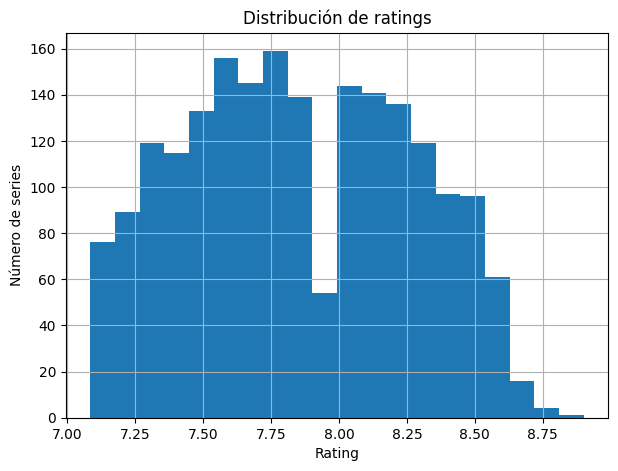

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.hist(df_model['rating'], bins=20)
plt.xlabel('Rating')
plt.ylabel('Número de series')
plt.title('Distribución de ratings')
plt.grid(True)
plt.show()


La distribución muestra que los ratings se concentran en valores altos, lo cual es coherente con el hecho de que el dataset incluye únicamente series altamente valoradas. Esto confirma el **sesgo de selección** del conjunto de datos.


## 4.2 Relación entre votos y rating

A continuación se analiza la relación entre el número de votos (transformado logarítmicamente) y el rating.


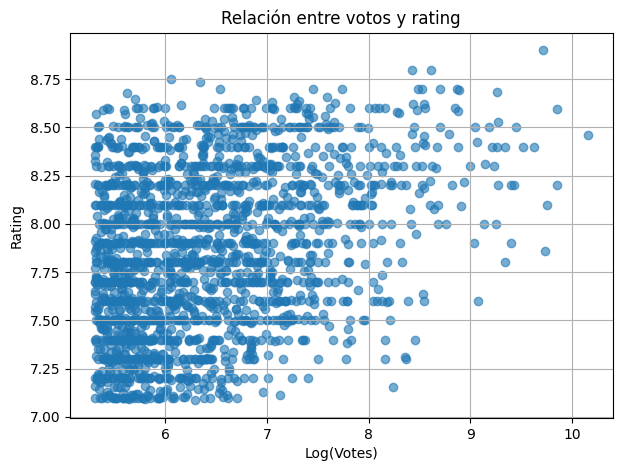

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(df_model['log_votes'], df_model['rating'], alpha=0.6)
plt.xlabel('Log(Votes)')
plt.ylabel('Rating')
plt.title('Relación entre votos y rating')
plt.grid(True)
plt.show()


Aunque visualmente se observa que muchas series con pocos votos presentan ratings elevados, esto se debe a la alta
variabilidad asociada a un bajo número de valoraciones. En estos casos, el rating es menos estable y puede verse
inflado por un público reducido y altamente afín.

A nivel global, se aprecia una tendencia positiva moderada entre el número de votos y el rating promedio, lo que
indica que las series con mayor participación tienden a mantener calificaciones ligeramente superiores y más
consistentes.


## 4.3 Popularidad vs rating

Se analiza ahora la relación entre el indicador de popularidad y el rating.


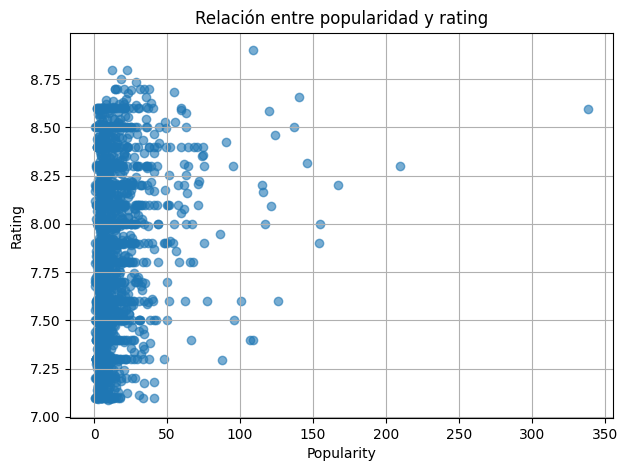

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(df_model['popularity'], df_model['rating'], alpha=0.6)
plt.xlabel('Popularity')
plt.ylabel('Rating')
plt.title('Relación entre popularidad y rating')
plt.grid(True)
plt.show()


La relación entre popularidad y rating es débil y altamente dispersa. Series con niveles muy diferentes de
popularidad pueden presentar calificaciones similares, lo que indica que la atención mediática o el interés
momentáneo del público no se traduce necesariamente en una mayor calidad percibida.

Este resultado sugiere que la popularidad es un indicador de visibilidad o tendencia, pero no un predictor
confiable del rating promedio.


## 4.4 Análisis del rating por género

El género es una variable categórica relevante. Para este análisis se consideran únicamente los géneros principales más frecuentes.


/tmp/ipython-input-596804501.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_genre, labels=top_genres, showfliers=False)


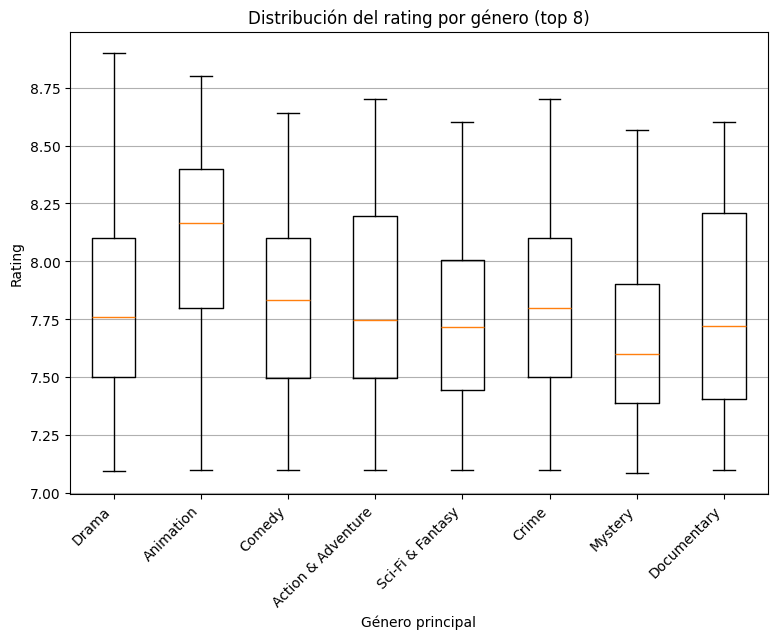

In [ ]:
# Seleccionar los 8 géneros más comunes
top_genres = df_model['main_genre'].value_counts().head(8).index.tolist()

data_by_genre = [
    df_model[df_model['main_genre'] == genre]['rating']
    for genre in top_genres
]

plt.figure(figsize=(9,6))
plt.boxplot(data_by_genre, labels=top_genres, showfliers=False)
plt.xlabel('Género principal')
plt.ylabel('Rating')
plt.title('Distribución del rating por género (top 8)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


El análisis por género muestra diferencias sutiles en la distribución del rating. Algunos géneros presentan medianas ligeramente más altas, aunque existe un solapamiento considerable entre ellos.


## 4.5 Análisis temporal: rating por año de estreno

Para evaluar posibles tendencias temporales, se analiza el rating en función del año de estreno.


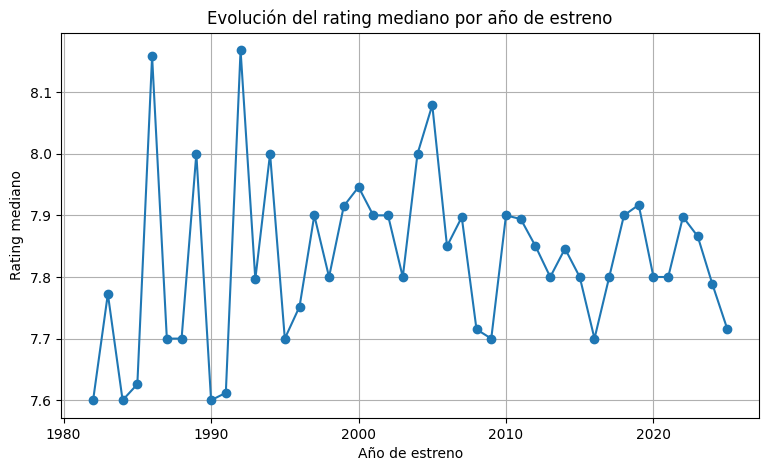

In [ ]:
ratings_by_year = (
    df_model
    .groupby('premiere_year')
    .agg(
        count=('rating', 'count'),
        median_rating=('rating', 'median')
    )
    .reset_index()
)

# Considerar solo años con suficientes observaciones
ratings_by_year = ratings_by_year[ratings_by_year['count'] >= 5]

plt.figure(figsize=(9,5))
plt.plot(
    ratings_by_year['premiere_year'],
    ratings_by_year['median_rating'],
    marker='o'
)
plt.xlabel('Año de estreno')
plt.ylabel('Rating mediano')
plt.title('Evolución del rating mediano por año de estreno')
plt.grid(True)
plt.show()


No se observa una tendencia temporal clara que indique que las series más recientes tengan ratings sistemáticamente más altos. Esto sugiere que la percepción de calidad no depende exclusivamente del año de estreno.


## 4.6 Correlación entre variables numéricas

Se calcula la matriz de correlación entre las principales variables numéricas del estudio.


In [ ]:
df_model[['rating', 'log_votes', 'popularity', 'premiere_year']].corr()


,rating,log_votes,popularity,premiere_year
rating,1.000000,0.338200,0.197789,0.021820
log_votes,0.338200,1.000000,0.524432,-0.012029
popularity,0.197789,0.524432,1.000000,-0.124568
premiere_year,0.021820,-0.012029,-0.124568,1.000000


La matriz de correlación confirma que:
- `log_votes` presenta la correlación más alta con el rating, aunque es moderada.
- `popularity` y `premiere_year` muestran correlaciones débiles con el rating.


## 4.7 Principales hallazgos del EDA

A partir del análisis exploratorio se pueden destacar los siguientes puntos:

- Los ratings presentan una distribución concentrada en valores altos.
- Existe una relación positiva moderada entre votos y rating.
- La popularidad no es un buen predictor directo del rating.
- El género influye en el rating, aunque las diferencias no son extremas.
- No se observa una tendencia temporal clara en la calidad percibida de las series.

Estos hallazgos guían la selección de variables y el enfoque del modelo predictivo que se desarrollará en la siguiente sección.


# 5. Predictive Modeling: Rating Regression Model

En esta sección se construye un modelo de regresión con el objetivo de predecir el rating de una serie web a partir
de sus metadatos. El propósito no es obtener un modelo altamente preciso, sino evaluar en qué medida variables como
el número de votos, la popularidad, el género y el año de estreno contribuyen a explicar la calificación promedio.


## 5.1 Planteamiento del problema

El problema se define como una tarea de **regresión supervisada**, donde:

- Variable objetivo (`y`): `rating`
- Variables predictoras (`X`):  
  - `log_votes`  
  - `popularity`  
  - `premiere_year`  
  - `main_genre` (codificada como variables dummy)

El modelo intentará estimar el rating promedio de una serie a partir de estas características.


## 5.2 Preparación de los datos para el modelo

Antes de entrenar el modelo, se preparan las variables predictoras:

- Se utiliza `log_votes` en lugar de `votes` para reducir la asimetría.
- La variable categórica `main_genre` se transforma mediante *one-hot encoding*.
- Para evitar una dimensionalidad excesiva, solo se consideran los géneros más frecuentes.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Copia del dataset preparado
df_ml = df_model.copy()

# Reducir géneros a los más frecuentes
top_genres = df_ml['main_genre'].value_counts().head(10).index
df_ml['main_genre_reduced'] = df_ml['main_genre'].apply(
    lambda x: x if x in top_genres else 'Other'
)

# One-hot encoding
df_ml = pd.get_dummies(
    df_ml,
    columns=['main_genre_reduced'],
    drop_first=True
)

# Variables predictoras y objetivo
X = df_ml.drop(columns=['rating', 'main_genre'])
y = df_ml['rating']


## 5.3 División en conjuntos de entrenamiento y prueba

El dataset se divide en un conjunto de entrenamiento y uno de prueba para evaluar el rendimiento del modelo en datos no vistos.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## 5.4 Modelo base: Regresión Lineal

Se entrena un modelo de regresión lineal como **baseline**, debido a su simplicidad e interpretabilidad.


In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

## 5.5 Evaluación del modelo

El rendimiento del modelo se evalúa utilizando métricas estándar para problemas de regresión.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)



MAE: 0.31680715451533137
RMSE: 0.3808153775592415
R²: 0.17881786846201164


El RMSE se ha obtenido como la raíz cuadrada del error cuadrático medio, al no disponer la versión del software utilizada de la opción de cálculo directo.

### Interpretación de métricas

- **MAE (Mean Absolute Error):** error promedio en unidades de rating.
- **RMSE (Root Mean Squared Error):** penaliza errores grandes.
- **R²:** proporción de varianza explicada por el modelo.

Dado el rango reducido del rating y el sesgo del dataset, no se esperan valores altos de R².


## 5.6 Interpretación de los coeficientes

La interpretación de los coeficientes permite analizar qué variables influyen positiva o negativamente en la predicción del rating.


In [ ]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

coefficients


,Feature,Coefficient
3,main_genre_reduced_Animation,0.300807
9,main_genre_reduced_Mystery,-0.193866
0,log_votes,0.164572
6,main_genre_reduced_Documentary,0.113491
11,main_genre_reduced_Sci-Fi & Fantasy,-0.092277
12,main_genre_reduced_Soap,0.090673
5,main_genre_reduced_Crime,-0.051800
4,main_genre_reduced_Comedy,0.046331
10,main_genre_reduced_Other,-0.027918
2,premiere_year,0.001549


Los coeficientes sugieren que:

- `log_votes` tiene un efecto positivo moderado sobre el rating.
- Algunos géneros presentan coeficientes positivos o negativos, indicando diferencias sutiles en la valoración promedio.
- `popularity` y `premiere_year` muestran un impacto reducido, consistente con el análisis exploratorio previo.


## 5.7 Limitaciones del modelo

Este modelo presenta varias limitaciones:

- El rating es una variable subjetiva influida por factores no incluidos en el dataset.
- El conjunto de datos tiene baja varianza en la variable objetivo.
- La relación entre variables puede ser no lineal.
- El uso de un único género principal simplifica excesivamente la realidad.

Estas limitaciones justifican el uso del modelo como referencia y no como predictor definitivo.


# 6. Conclusiones

El objetivo de este estudio fue analizar los factores que influyen en el rating de una serie web utilizando un conjunto
de 2000 series altamente valoradas. A través de un enfoque estructurado que combinó análisis exploratorio de datos y
modelado predictivo, se obtuvieron una serie de hallazgos relevantes sobre la relación entre distintas variables y la
calificación promedio otorgada por el público.


## 6.1 Resumen de hallazgos principales

A partir del análisis realizado, se pueden destacar las siguientes conclusiones:

- Los ratings presentan una distribución concentrada en valores altos, lo que confirma el sesgo de selección del
  dataset y limita la varianza de la variable objetivo.
  
- Existe una relación positiva moderada entre el número de votos y el rating promedio. Sin embargo, esta relación
  no es determinista y presenta una dispersión considerable, especialmente en series con pocos votos.

- Las series con un bajo número de votos tienden a mostrar ratings más extremos, lo que indica una mayor inestabilidad
  de la calificación cuando la participación del público es reducida.

- La popularidad muestra una relación débil con el rating, lo que sugiere que la atención mediática o el interés
  momentáneo no son indicadores confiables de calidad percibida.

- El género influye en el rating, aunque las diferencias observadas entre géneros son moderadas y presentan un alto
  grado de solapamiento.


## 6.2 Resultados del modelo predictivo

El modelo de regresión lineal desarrollado permitió evaluar cuantitativamente el impacto de las variables analizadas:

- El número de votos (en escala logarítmica) resultó ser uno de los predictores más relevantes del rating.
- Algunas categorías de género mostraron efectos positivos o negativos, aunque de magnitud limitada.
- La popularidad y el año de estreno aportaron poca capacidad explicativa adicional.

El valor relativamente bajo de R² obtenido es coherente con la naturaleza subjetiva del rating y con la baja variabilidad
presente en el dataset, y no debe interpretarse como un fallo del modelo.


## 6.3 Respuestas a las preguntas de investigación

En relación con las preguntas planteadas al inicio del estudio:

1. **¿Existe una relación entre el número de votos y el rating?**  
   Sí, existe una relación positiva moderada, aunque con alta dispersión.

2. **¿La popularidad predice el rating?**  
   No de manera significativa. La popularidad no es un predictor confiable de calidad percibida.

3. **¿Algunos géneros reciben mejores ratings que otros?**  
   Se observan diferencias entre géneros, pero estas son moderadas y no determinantes.

4. **¿El año de estreno influye en el rating?**  
   No se identifica una tendencia temporal clara que indique que las series más recientes sean mejor valoradas.

5. **¿Es posible predecir el rating a partir de metadatos básicos?**  
   Parcialmente. Los metadatos permiten explicar una fracción limitada de la variabilidad del rating.


## 6.4 Reflexión final

Este estudio muestra que la percepción de calidad de una serie web es el resultado de múltiples factores, muchos de los
cuales no pueden capturarse únicamente mediante metadatos cuantitativos. Aunque variables como el número de votos y
el género aportan información relevante, una parte sustancial del rating permanece explicada por elementos subjetivos
y contextuales.

Estos resultados refuerzan la importancia de combinar análisis cuantitativo con enfoques más ricos, como el análisis
de contenido o el estudio de opiniones textuales, para comprender mejor la valoración del público.


# 7. Trabajo futuro

Si bien el presente estudio permitió identificar algunos factores asociados al rating de las series web, existen
diversas líneas de trabajo que podrían ampliar y profundizar los resultados obtenidos.


## 7.1 Mejora del modelado predictivo

El modelo de regresión lineal utilizado cumple el rol de modelo base (*baseline*). Como trabajo futuro, podrían
explorarse modelos más complejos capaces de capturar relaciones no lineales entre las variables, tales como:

- Random Forest Regressor
- Gradient Boosting
- XGBoost o LightGBM

Estos modelos podrían mejorar la capacidad predictiva y ofrecer una comparación interesante con el enfoque lineal.


## 7.2 Incorporación de nuevas variables

El dataset contiene información adicional que no fue explotada completamente en este estudio. Algunas posibles
extensiones incluyen:

- Análisis del idioma original y país de origen.
- Uso de múltiples géneros por serie en lugar de un único género principal.
- Creación de variables temporales más detalladas (década, antigüedad desde el estreno).


## 7.3 Análisis de texto (NLP)

Una de las extensiones más relevantes sería el análisis de la variable `overview` mediante técnicas de
Procesamiento del Lenguaje Natural (NLP), tales como:

- Longitud y complejidad del texto.
- Análisis de sentimiento.
- Extracción de palabras clave o temas.
- Modelos basados en TF-IDF o embeddings.

Esto permitiría incorporar información semántica del contenido de la serie, potencialmente aumentando la
capacidad explicativa del modelo.


## 7.4 Sistemas de recomendación

A partir del dataset analizado, podría desarrollarse un sistema de recomendación básico que sugiera series
similares en función de género, rating y popularidad, o incluso combinando información textual de las descripciones.


## 7.5 Ampliación del dataset

Finalmente, una línea futura interesante sería ampliar el análisis a datasets que incluyan:

- Series con ratings bajos y medios, para reducir el sesgo de selección.
- Datos longitudinales que permitan analizar la evolución del rating y la popularidad en el tiempo.
- Comparaciones con otros tipos de contenido, como películas o documentales.

Estas extensiones permitirían obtener conclusiones más generales sobre los factores que influyen en la percepción
de calidad del contenido audiovisual.


## 7.6 Cierre final

Este estudio representa un primer acercamiento al análisis de factores que influyen en el rating de series web,
demostrando cómo el uso de técnicas de ciencia de datos puede aportar información valiosa incluso en dominios
altamente subjetivos. El enfoque seguido sienta una base sólida para desarrollos futuros más complejos y completos.
